# K-Means Clustering In Python On A Professors Salaries Dataset

Hi there. This page features K-Means Clustering in Python on a dataset with professors salaries. The dcoumentation is from [here](https://vincentarelbundock.github.io/Rdatasets/doc/carData/Salaries.html) and the .csv file is from [here](https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv).

**References**

* https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/
* Wes McKinney's Book - Python For Data Analysis

In [2]:
# Documentation Section

'''
Salaries for Professors
Description
The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors 
in a college in the U.S. The data were collected as part of the on-going effort of the 
college's administration to monitor salary differences between male and female faculty members.

Usage
Salaries
Format
A data frame with 397 observations on the following 6 variables.

rank
a factor with levels AssocProf AsstProf Prof

discipline
a factor with levels A (“theoretical” departments) or B (“applied” departments).

yrs.since.phd
years since PhD.

yrs.service
years of service.

sex
a factor with levels Female Male

salary
nine-month salary, in dollars.

'''

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Enable matplotlib in Jupyter Notebook
%matplotlib inline

In [3]:
# Load in dataset.

prof_salaries = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv")


In [4]:
# Head of dataset:

prof_salaries.head(15)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


In [5]:
# Tail of dataset:

prof_salaries.tail(15)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
382,383,AssocProf,A,8,5,Male,86895
383,384,Prof,A,44,44,Male,105000
384,385,Prof,A,27,21,Male,125192
385,386,Prof,A,15,9,Male,114330
386,387,Prof,A,29,27,Male,139219
387,388,Prof,A,29,15,Male,109305
388,389,Prof,A,38,36,Male,119450
389,390,Prof,A,33,18,Male,186023
390,391,Prof,A,40,19,Male,166605
391,392,Prof,A,30,19,Male,151292


In [6]:
# Remove unnamed (first) column:

prof_salaries = prof_salaries.drop(['Unnamed: 0'], axis = 1)

In [7]:
# Rename columns:

prof_salaries.columns = ['Prof_Rank', 'Discipline', 'Years_Since_PHD', 'Years_Service', 'Gender', 'Salary']

prof_salaries.head()

,Prof_Rank,Discipline,Years_Since_PHD,Years_Service,Gender,Salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
# Look At Unique Professorship Ranks:

prof_salaries['Prof_Rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [9]:
# Look At Unique Years Since PHD:

prof_salaries['Years_Since_PHD'].unique()

array([19, 20,  4, 45, 40,  6, 30, 21, 18, 12,  7,  1,  2, 38, 37, 39, 31,
       36, 34, 24, 13, 35,  5, 11, 22, 41,  9, 23, 25, 28, 16, 14, 10,  8,
        3, 33, 17, 29, 26, 43, 15, 42, 32, 54, 56, 27, 48, 46, 47, 52, 51,
       49, 44], dtype=int64)

In [10]:
# Look At Unique Years_Service PHD:

prof_salaries['Years_Service'].unique()

array([18, 16,  3, 39, 41,  6, 23, 45, 20,  8,  2,  1,  0, 34, 36, 26, 31,
       30, 19,  4,  9, 21, 27, 38, 15, 28, 25, 11,  5, 12, 17, 14, 37,  7,
       10, 29, 32, 22, 49, 57, 24, 53, 33, 40, 35, 43, 44, 48, 46, 51, 13,
       60], dtype=int64)

## An Initial Scatterplot Of Years Of Service Versus Salary

Before applying K-Means clustering, it is a good idea to look at an initial scatterplot. I prefer generating scatterplots with the use of `matplotlib` and `seaborn`.



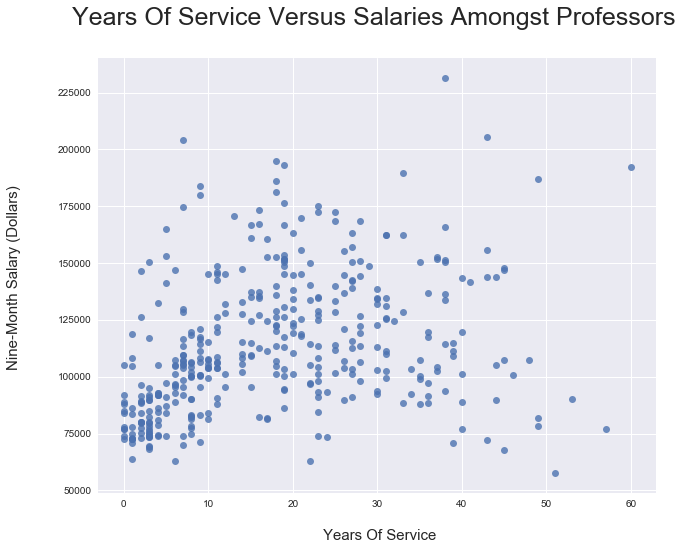

In [11]:
# Scatterplot Without regression fit:

plt.figure(figsize=(10, 8))# Resize plot
fig  = sns.regplot(x = 'Years_Service', y = 'Salary', data = prof_salaries, fit_reg=False)

plt.xlabel("\n Years Of Service", fontsize = 15)
plt.ylabel("Nine-Month Salary (Dollars) \n\n", fontsize = 15)
plt.title("Years Of Service Versus Salaries Amongst Professors \n", fontsize = 25) 
plt.show(fig)

sns.plt.show()

It appears that a higher number of years of service does (somewhat) yield a higher nine-month salary. Do note that from the plot, there is no mention of the types of fields these professors are in. Some fields are in higher demand than others and thus pay more.

### K-Means Clustering On The Dataset



In [12]:
from sklearn.cluster import KMeans

In [13]:
prof_years_salaries = prof_salaries[['Years_Service', 'Salary']]

prof_years_salaries.head(15)

,Years_Service,Salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
5,6,97000
6,23,175000
7,45,147765
8,20,119250
9,18,129000


In [14]:
# K-Means model with two clusters:

kmeans_twocl = KMeans(n_clusters=2)

In [15]:
# Fit K-Means to prof_years_salaries:

kmeans_two = kmeans_twocl.fit(prof_years_salaries)

kmeans_two

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
# Take a look at cluster centers

cluster_two = kmeans_twocl.cluster_centers_

cluster_two

array([[  2.25214286e+01,   1.47725364e+05],
       [  1.49416342e+01,   9.51747588e+04]])

In [17]:
# Obtaining cluster labels:

kmeans_two_labels = kmeans_twocl.predict(prof_years_salaries)

kmeans_two_labels

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1,

In [19]:
# Add the cluster labels column into the prof_years_salaries dataframe with the .insert() from pandas.

prof_years_salaries.insert(loc = 2, column = "Cluster_Label", value = kmeans_two_labels)


In [21]:
# Preview new dataframe

prof_years_salaries.head(10)

,Years_Service,Salary,Cluster_Label
0,18,139750,0
1,16,173200,0
2,3,79750,1
3,39,115000,1
4,41,141500,0
5,6,97000,1
6,23,175000,0
7,45,147765,0
8,20,119250,1
9,18,129000,0


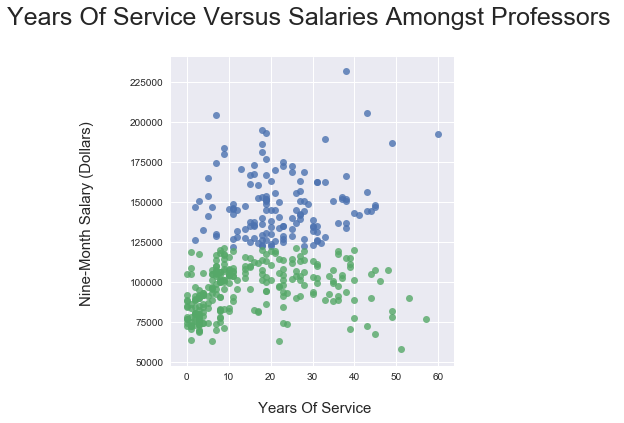

In [23]:
# Scatterplot Without regression fit With Two Clusters

plt.figure(figsize=(10, 8))# Resize plot
fig  = sns.lmplot(x = 'Years_Service', y = 'Salary', hue = 'Cluster_Label', data = prof_years_salaries, fit_reg=False, legend=False)

plt.xlabel("\n Years Of Service", fontsize = 15)
plt.ylabel("Nine-Month Salary (Dollars) \n\n", fontsize = 15)
plt.title("Years Of Service Versus Salaries Amongst Professors \n", fontsize = 25) 
plt.show(fig)

sns.plt.show()

## Determining The Optimal Number Of Clusters With A Scree Plot

The previous section dealt with two clusters. Is having two clusters optimal? We can explore the other options in terms of the number of clusters. A scree plot is a visualization tool which helps determine the "optimal" number of clusters.

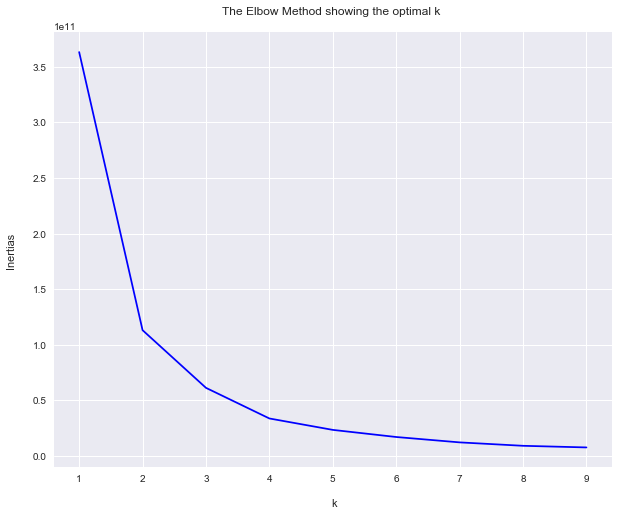

In [75]:
# References: https://pythonprogramminglanguage.com/kmeans-elbow-method/
# Datacamp Course: Unsupervised Learning With Python
# More clusters = less inertia

from sklearn.cluster import KMeans

inertias = []
num_clusters = range(1,10)

for k in num_clusters:
    model = KMeans(n_clusters = k)
    kmeans_k = model.fit(prof_years_salaries)
    inertias.append(model.inertia_)
    
# Elbow/Scree Plot

plt.figure(figsize=(10, 8))# Resize plot
plt.plot(num_clusters, inertias, 'bx-')
plt.xlabel('\n k')
plt.ylabel('Inertias \n')
plt.title('The Elbow Method showing the optimal k \n')
plt.show()

From the scree/elbow plot a good choice for the number of clusters is 3 or 4.

In [76]:
# K-Means model with two clusters:

kmeans_fourcl = KMeans(n_clusters=4)

# Fit K-Means to prof_years_salaries:

kmeans_four = kmeans_fourcl.fit(prof_years_salaries)

kmeans_four

# Obtaining cluster labels:

kmeans_four_labels = kmeans_fourcl.predict(prof_years_salaries)

kmeans_four_labels




array([3, 2, 0, 1, 3, 1, 2, 3, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 3, 3, 0, 1, 0,
       1, 0, 1, 3, 0, 0, 1, 3, 0, 1, 0, 0, 0, 3, 0, 3, 1, 3, 0, 1, 2, 0, 1,
       1, 3, 3, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 3, 3, 1, 0, 1, 0, 3, 2, 0, 0, 3, 3, 3, 0, 1, 3, 3, 0, 2, 1, 1, 1,
       1, 2, 3, 0, 1, 3, 1, 1, 3, 3, 3, 3, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 1,
       1, 3, 1, 0, 0, 1, 3, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 1,
       0, 3, 1, 0, 1, 0, 1, 1, 0, 3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 0, 1, 3, 0,
       2, 1, 0, 0, 1, 2, 3, 1, 2, 0, 3, 0, 3, 1, 1, 1, 1, 3, 0, 3, 3, 1, 3,
       1, 3, 1, 1, 1, 3, 2, 3, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 3, 2, 1, 2,
       1, 0, 2, 0, 1, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3, 1, 3, 0, 1, 0, 0, 0, 3,
       0, 0, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 3, 2, 1, 1, 3,
       0, 1, 0, 3, 0, 0, 0, 0, 1, 1, 3, 1, 3, 3, 1, 0, 1, 3, 2, 0, 0, 0, 0,
       1, 2, 1, 1, 3, 1, 0, 3, 0, 0, 1, 0, 3, 0, 2, 2, 2, 1, 1, 1, 3, 3, 0,
       0, 0,

In [77]:
# Add cluster labels as a column in prof_salaries dataset:

prof_years_salaries_fourcl = prof_years_salaries

# Add the cluster labels column into the prof_years_salaries dataframe with the .insert() from pandas.

prof_years_salaries_fourcl.insert(loc = 2, column = "Cluster", value = kmeans_four_labels)

# Preview new dataframe

prof_years_salaries_fourcl.head(10)

,Years_Service,Salary,Cluster,Cluster_Label
0,18,139750,3,0
1,16,173200,2,0
2,3,79750,0,1
3,39,115000,1,1
4,41,141500,3,0
5,6,97000,1,1
6,23,175000,2,0
7,45,147765,3,0
8,20,119250,1,1
9,18,129000,3,0


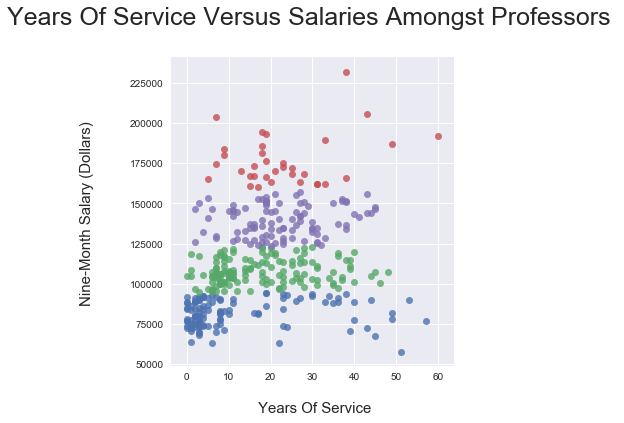

In [78]:
# Scatterplot Without regression fit With Four Clusters

plt.figure(figsize=(11, 9))# Resize plot
fig  = sns.lmplot(x = 'Years_Service', y = 'Salary', hue = 'Cluster', data = prof_years_salaries_fourcl, fit_reg=False, legend=False)

plt.xlabel("\n Years Of Service", fontsize = 15)
plt.ylabel("Nine-Month Salary (Dollars) \n\n", fontsize = 15)
plt.title("Years Of Service Versus Salaries Amongst Professors \n", fontsize = 25) 
plt.show(fig)

sns.plt.show()

In [79]:
prof_years_salaries


,Years_Service,Salary,Cluster,Cluster_Label
0,18,139750,3,0
1,16,173200,2,0
2,3,79750,0,1
3,39,115000,1,1
4,41,141500,3,0
5,6,97000,1,1
6,23,175000,2,0
7,45,147765,3,0
8,20,119250,1,1
9,18,129000,3,0
